# EEL 6026: Project

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Problem Description

We desire to minimize the Rosenbrook function $f(x_{1},x_{2}) = (x_{1}^{2} - x_{2})^{2} + (x_{1} - 1)^{2}$ subject to equality constraint $h(x_{1},x_{2}) = x_{1} + x_{2}^{2} - 1 = 0 $ using several constrained optimization techniques including

* Reduced Gradient
* Lagrangian
* External Penalty

Our main areas of analysis consisted of required number of iterations $n$ needed for convergence and lowest value of Rosenbrook reached $f(x_{1}^{n}, x_{2}^{n})$. Please note that $\min_{x} f(x_{1}, x_{2})$ subject to $h(x_{1},x_{2})$ $= \{1.0532,0.2307\}$

### Reduced Gradient Method

In [2]:
def constraint(x2):
    return x2**2 + 1

In [ ]:
i = 0
print_after = 1

# Define the symbols
x1, x2 = sp.symbols('x1 x2')

# Define the function and constraint
f = 100*(x1**2 - x2)**2 + (x1 - 1)**2
h = x1 - x2**2 - 1

# Compute needed partial derivatives
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)
dh_dx1 = sp.diff(h, x1)
dh_dx2 = sp.diff(h, x2)

# Point at which to compute the gradient
X2 = 2
X1 = constraint(X2)
x0 = np.array([X1,X2])
point = {x1: X1, x2: X2}
f_val = f.subs(point) # value of function evaluated at 'point'

# Optimization stopping criteria
eps = 0.0001

# Computing 1st/2nd order information wrt independent variable 
grad_F = df_dx2 - dh_dx1*dh_dx2*df_dx1
H = sp.diff(grad_F, x2)

grad_eval = np.array(grad_F.evalf(subs=point), dtype=np.float32)
gradient_norm = np.linalg.norm(grad_eval)

α_star = np.dot(grad_eval, grad_eval) / np.dot(grad_eval, np.array(H.evalf(subs=point), dtype=np.float32) * grad_eval)
print(f'Iteration: {i}, X1: {X1}, X2: {X2}, α_star: {α_star}, grad_norm: {gradient_norm}, f(X1, X2): {f_val}\n')
# Initializing data arrays (for plotting)
points_array = np.array([[X1,X2]])
norm_grad_array = np.array([])
f_val_array = np.array([])

# Optimization Loop
while True:
    # Evaluate the gradient at the specific point and compute gradient update of current point
    grad_F = df_dx2 - dh_dx1*dh_dx2*df_dx1
    grad_eval = np.array(grad_F.evalf(subs=point), dtype=np.float32)
    α_star = np.dot(grad_eval, grad_eval) / np.dot(grad_eval, np.array(H.evalf(subs=point), dtype=np.float32) * grad_eval)
    
    # Updating steps based on gradients and constraint
    X2 -= α_star*grad_eval
    X1 = constraint(X2)
    
    # Updating previous point and computing norm of gradient
    point = {x1: X1, x2: X2}
    gradient_norm = np.linalg.norm(grad_eval)
    f_val = f.subs(point)
    
    # Keeping track of current iteration
    i += 1
    if i % print_after == 0:  
        print(f'Iteration: {i}, X1: {X1}, X2: {X2}, α_star: {α_star}, grad_norm: {gradient_norm}, f(X1, X2): {f_val}\n')
        
        # Storing relevant data in arrays
        points_array = np.concatenate([points_array, np.array([[X1,X2]])], axis=0)
        norm_grad_array = np.concatenate([norm_grad_array, np.array([gradient_norm])], axis=0)
        f_val_array = np.concatenate([f_val_array, np.array([f_val])], axis=0)
    
    # Performing check for gradient norm stoppage condition
    if gradient_norm < eps:
        # Storing relevant data in arrays
        points_array = np.concatenate([points_array, np.array([[X1,X2]])], axis=0)
        norm_grad_array = np.concatenate([norm_grad_array, np.array([gradient_norm])], axis=0)
        f_val_array = np.concatenate([f_val_array, np.array([f_val])], axis=0)
        
        print(f'Gradient Updates Complete at Iteration = {i} with final point (X1 = {round(X1,4)}, X2 = {round(X2,4)}), f(X1, X2): {round(f_val,4)}, and gradient norm = {gradient_norm}')
        break

Iteration: 0, X1: 5, X2: 2, α_star: 1.1874228221131489e-05, grad_norm: 179432.0, f(X1, X2): 52916

Iteration: 1, X1: 1.0170606508632432, X2: -0.1306164264678955, α_star: 1.1874228221131489e-05, grad_norm: 179432.0, f(X1, X2): 135.729500151244

Iteration: 2, X1: 1.0236776694890972, X2: 0.15387549996376038, α_star: 0.00079727778211236, grad_norm: 356.8291015625, f(X1, X2): 79.9313970190032

Iteration: 3, X1: 1.0556481560539765, X2: 0.23589861392974854, α_star: 0.0012403145665302873, grad_norm: 66.13089752197266, f(X1, X2): 77.1783405150284

Iteration: 4, X1: 1.0560502805393757, X2: 0.23674940451746807, α_star: 0.001346064149402082, grad_norm: 0.6320579648017883, f(X1, X2): 77.1780999317226

Iteration: 5, X1: 1.0560077946663586, X2: 0.23665965998952743, α_star: 0.0013469920959323645, grad_norm: 0.06662587821483612, f(X1, X2): 77.1780972610798

Iteration: 6, X1: 1.056012326171111, X2: 0.23666923368091375, α_star: 0.0013468944234773517, grad_norm: 0.007107974495738745, f(X1, X2): 77.1780972

### Brute-Force Method 

In [34]:
def F(x2):
    return x2**8 + 4*x2**6 - 2*x2**5 + 7*x2**4 - 4*x2**3 + 5*x2**2 - 2*x2 + 1

In [33]:
i = 0
print_after = 1

# Define the symbols
x1, x2 = sp.symbols('x1 x2')

# Define brute-force function
f = x2**8 + 4*x2**6 - 2*x2**5 + 7*x2**4 - 4*x2**3 + 5*x2**2 - 2*x2 + 1

# Compute gradient of function ∇F(x2)
df_dx2 = sp.diff(f, x2)
H = sp.diff(df_dx2, x2)

# Point at which to compute the gradient
X2 = 0
point = {x2: X2}
f_val = f.subs(point) # value of function evaluated at 'point'

# Optimization stopping criteria
eps = 0.0001

grad_eval = np.array(df_dx2.evalf(subs=point), dtype=np.float32)
gradient_norm = np.linalg.norm(grad_eval)

α_star = np.dot(grad_eval, grad_eval) / np.dot(grad_eval, np.array(H.evalf(subs=point), dtype=np.float32) * grad_eval)
print(f'Iteration: {i}, X2: {X2}, α_star: {α_star}, grad_norm: {gradient_norm}, F(X2): {f_val}\n')
# Initializing data arrays (for plotting)
points_array = np.array([[X1,X2]])
norm_grad_array = np.array([])
f_val_array = np.array([])

# Optimization Loop
while True:
    # Evaluate the gradient at the specific point and compute gradient update of current point
    grad_eval = np.array(df_dx2.evalf(subs=point), dtype=np.float32)
    α_star = np.dot(grad_eval, grad_eval) / np.dot(grad_eval, np.array(H.evalf(subs=point), dtype=np.float32) * grad_eval)
    
    # Updating steps based on gradients and constraint
    X2 -= α_star*grad_eval
    
    # Updating previous point and computing norm of gradient
    point = {x2: X2}
    gradient_norm = np.linalg.norm(grad_eval)
    f_val = f.subs(point)
    
    # Keeping track of current iteration
    i += 1
    if i % print_after == 0:  
        print(f'Iteration: {i}, X2: {X2}, α_star: {α_star}, grad_norm: {gradient_norm}, F(X2): {f_val}\n')
        
        # Storing relevant data in arrays
        points_array = np.concatenate([points_array, np.array([[X1,X2]])], axis=0)
        norm_grad_array = np.concatenate([norm_grad_array, np.array([gradient_norm])], axis=0)
        f_val_array = np.concatenate([f_val_array, np.array([f_val])], axis=0)
    
    # Performing check for gradient norm stoppage condition
    if gradient_norm < eps:
        # Storing relevant data in arrays
        points_array = np.concatenate([points_array, np.array([[X1,X2]])], axis=0)
        norm_grad_array = np.concatenate([norm_grad_array, np.array([gradient_norm])], axis=0)
        f_val_array = np.concatenate([f_val_array, np.array([f_val])], axis=0)
        
        print(f'Gradient Updates Complete at Iteration = {i} with final point (X2 = {X2}), f(X2): {f_val}, and gradient norm = {gradient_norm}')
        print(f"At X2 = {X2}, based on the constraint, X1 = {constraint(X2)}")
        break

Iteration: 0, X2: 0, α_star: 0.10000000149011612, grad_norm: 2.0, F(X2): 1

Iteration: 1, X2: 0.20000000298023224, α_star: 0.10000000149011612, grad_norm: 2.0, F(X2): 0.778818559212570

Iteration: 2, X2: 0.2313217930495739, α_star: 0.11854544281959534, grad_norm: 0.2642175853252411, F(X2): 0.774732808160275

Iteration: 3, X2: 0.23072739347117022, α_star: 0.11363436281681061, grad_norm: 0.005230808164924383, F(X2): 0.774731253054855

Iteration: 4, X2: 0.230727100735038, α_star: 0.11374612897634506, grad_norm: 2.5735921553859953e-06, F(X2): 0.774731253054478

Gradient Updates Complete at Iteration = 4 with final point (X2 = 0.230727100735038), f(X2): 0.774731253054478, and gradient norm = 2.5735921553859953e-06
At X2 = 0.230727100735038, based on the constraint, X1 = 1.0532349950135964


### Lagrangian Method

In [ ]:
i = 0
print_after = 200

# Define the symbols
x1, x2, λ, α = sp.symbols('x1 x2 λ α')

# Define the lagrangian
l = (x1**2 - x2)**2 + (x1 - 1)**2 + λ*(x1 - x2**2 - 1)

# Compute needed partial derivatives
dl_dx1 = sp.diff(l, x1)
dl_dx2 = sp.diff(l, x2)
dl_dλ = sp.diff(l, λ)

# Point at which to compute the gradient
X2 = 1
X1 = 0
Λ = -4
point = {x1:X1, x2:X2, λ:Λ}
x0 = np.array([X1,X2])
l_val = l.subs(point) # value of function evaluated at 'point'

# Optimization stopping criteria
eps = 0.00001

grad_eval = np.array((dl_dx1+dl_dx2+dl_dλ).subs(point), dtype=np.float32)
gradient_norm = np.linalg.norm(grad_eval)

# Defining fixed step size
α_star = 1e-5 

print(f'Iteration: {i}, X1: {X1}, X2: {X2}, λ: {Λ} α_star: {α_star}, grad_norm: {gradient_norm}, l(X1, X2, λ): {l_val}\n')

# Initializing data arrays (for plotting)
points_array = np.array([[X1,X2]])
norm_grad_array = np.array([])
l_val_array = np.array([])

# Optimization Loop
while True:
    
    # Updating steps based on gradients and constraint
    X1 -= α_star*dl_dx1.subs(point)
    X2 -= α_star*dl_dx2.subs(point)
    Λ -= α_star*dl_dλ.subs(point)
    
    # Updating previous point and computing norm of gradient
    point = {x1:X1, x2:X2, λ:Λ}
    grad_eval = np.array((dl_dx1+dl_dx2+dl_dλ).subs(point), dtype=np.float32)
    gradient_norm = np.linalg.norm(grad_eval)
    l_val = l.subs(point)
    
    # Keeping track of current iteration
    i += 1
    if i % print_after == 0:  
        print(f'Iteration: {i}, X1: {X1}, X2: {X2}, λ: {Λ} α_star: {α_star}, grad_norm: {gradient_norm}, l(X1, X2, λ): {l_val}\n')
        
        # Storing relevant data in arrays
        points_array = np.concatenate([points_array, np.array([[X1,X2]])], axis=0)
        norm_grad_array = np.concatenate([norm_grad_array, np.array([gradient_norm])], axis=0)
        f_val_array = np.concatenate([l_val_array, np.array([l_val])], axis=0)
    
    # Performing check for gradient norm stoppage condition
    if gradient_norm < eps:
        # Storing relevant data in arrays
        points_array = np.concatenate([points_array, np.array([[X1,X2]])], axis=0)
        norm_grad_array = np.concatenate([norm_grad_array, np.array([gradient_norm])], axis=0)
        f_val_array = np.concatenate([l_val_array, np.array([l_val])], axis=0)
        
        print(f'Gradient Updates Complete at Iteration = {i} with final point (X1 = {round(X1,4)}, X2 = {round(X2,4)}, λ = {round(Λ,4)}), l(X1, X2, λ): {round(l_val,4)}, and gradient norm = {gradient_norm}')
        break

Iteration: 0, X1: 0, X2: 1, λ: -4 α_star: 1e-05, grad_norm: 2.0, l(X1, X2, λ): 10

Iteration: 200, X1: 0.0120193250705245, X2: 0.980205619865227, λ: -3.99605122036772 α_star: 1e-05, grad_norm: 1.826111078262329, l(X1, X2, λ): 9.72406529399686

Iteration: 400, X1: 0.0240751839160662, X2: 0.960819190668479, λ: -3.99220334003095 α_star: 1e-05, grad_norm: 1.656427264213562, l(X1, X2, λ): 9.45607599933695

Iteration: 600, X1: 0.0361640987523825, X2: 0.941832826363203, λ: -3.98845335622609 α_star: 1e-05, grad_norm: 1.4908994436264038, l(X1, X2, λ): 9.19573527746234

Iteration: 800, X1: 0.0482825865076913, X2: 0.923238857241707, λ: -3.98479838126547 α_star: 1e-05, grad_norm: 1.3294808864593506, l(X1, X2, λ): 8.94276148850107

Iteration: 1000, X1: 0.0604271577446233, X2: 0.905029821689573, λ: -3.98123563750217 α_star: 1e-05, grad_norm: 1.1721266508102417, l(X1, X2, λ): 8.69688741171560

Iteration: 1200, X1: 0.0725943157846002, X2: 0.887198458238638, λ: -3.97776245252061 α_star: 1e-05, grad_nor

### Exterior Penalty Method

In [ ]:
i = 0
print_after = 1

# Define the symbols
x1, x2 = sp.symbols('x1 x2')

# Define inital α and geometric rate 
α = 0.1
r = 2

# Define the constraint and augmented function
h = x1 - x2**2 - 1
f = (x1**2 - x2)**2 + (x1 - 1)**2 + α * h**2

# Compute needed partial derivatives
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)
df = sp.Matrix([df_dx1, df_dx2])
H = sp.Matrix(np.array([[sp.diff(df_dx1,x1), sp.diff(df_dx1,x2)],
                        [sp.diff(df_dx2,x1), sp.diff(df_dx2,x2)]]))

# Point at which to compute the gradient
X1 = 0
X2 = 0
x0 = np.array([X1,X2])
point = {x1: X1, x2: X2}
f_val = f.subs(point) # value of function evaluated at 'point'

# Optimization stopping criteria
eps = 2e-13
temp_eps = 0.1

grad_eval = np.array(df.evalf(subs=point), dtype=np.float32)[:,0]
gradient_norm = np.linalg.norm(grad_eval)
α_star = np.dot(grad_eval, grad_eval) / np.dot(grad_eval, np.array(H.evalf(subs=point), dtype=np.float32) @ grad_eval)

# Initializing data arrays (for plotting)
points_array = np.array([[X1,X2]])
norm_grad_array = np.array([])
f_val_array = np.array([])

# Optimization Loop
j = 0
while gradient_norm > eps:
        
    print(f'α-Update: {j}, α: {α}')
    print(f'Iteration: {i}, X1: {X1}, X2: {X2}, α_star: {α_star}, grad_norm: {gradient_norm}, f(X1, X2): {f_val}\n')
    while True:
        # Evaluate the gradient at the specific point and compute gradient update of current point
        grad_eval = np.array(df.evalf(subs=point), dtype=np.float32)[:,0]
        α_star = np.dot(grad_eval, grad_eval) / np.dot(grad_eval, np.array(H.evalf(subs=point), dtype=np.float32) @ grad_eval)
        
        # Updating steps based on gradients and constraint
        X1 -= α_star*df_dx1.subs(point)
        X2 -= α_star*df_dx2.subs(point)
        
        # Updating previous point and computing norm of gradient
        point = {x1: X1, x2: X2}
        gradient_norm = np.linalg.norm(grad_eval)
        f_val = f.subs(point)
        
        # Keeping track of current iteration
        i += 1
        if i % print_after == 0:  
            print(f'Iteration: {i}, X1: {X1}, X2: {X2}, α_star: {α_star}, grad_norm: {gradient_norm}, f(X1, X2): {f_val}\n')
            
            # Storing relevant data in arrays
            points_array = np.concatenate([points_array, np.array([[X1,X2]])], axis=0)
            norm_grad_array = np.concatenate([norm_grad_array, np.array([gradient_norm])], axis=0)
            f_val_array = np.concatenate([f_val_array, np.array([f_val])], axis=0)
        
        # Performing check for gradient norm stoppage condition
        if gradient_norm < temp_eps:
            # Storing relevant data in arrays
            points_array = np.concatenate([points_array, np.array([[X1,X2]])], axis=0)
            norm_grad_array = np.concatenate([norm_grad_array, np.array([gradient_norm])], axis=0)
            f_val_array = np.concatenate([f_val_array, np.array([f_val])], axis=0)
            
            print(f'Gradient Updates Complete at Iteration = {i} with {j} α-updates! Solution: (X1 = {round(X1,4)}, X2 = {round(X2,4)}), f(X1, X2): {round(f_val,4)}, α: {α}, and gradient norm = {round(gradient_norm,11)}')
            break
        
    # Updating augmented function and its derivatives based on updated α
    α *= r
    f = (x1**2 - x2)**2 + (x1 - 1)**2 + α * h**2
    
    # Compute needed partial derivatives
    df_dx1 = sp.diff(f, x1)
    df_dx2 = sp.diff(f, x2)
    df = sp.Matrix([df_dx1, df_dx2])
    H = sp.Matrix(np.array([[sp.diff(df_dx1,x1), sp.diff(df_dx1,x2)],
                            [sp.diff(df_dx2,x1), sp.diff(df_dx2,x2)]]))
    
    # Updating continually-shrinking stopping criteria
    temp_eps *= 0.1
    
    j += 1

α-Update: 0, α: 0.1
Iteration: 0, X1: 0, X2: 0, α_star: 0.45454543828964233, grad_norm: 2.200000047683716, f(X1, X2): 1.10000000000000

Iteration: 1, X1: 0.999999964237213, X2: 0, α_star: 0.45454543828964233, grad_norm: 2.200000047683716, f(X1, X2): 0.999999856948862

Iteration: 2, X1: 0.732620297045633, X2: 0.133689841006528, α_star: 0.06684492528438568, grad_norm: 4.472135543823242, f(X1, X2): 0.242072199180386

Iteration: 3, X1: 0.649875909335247, X2: 0.244731674992299, α_star: 0.14041155576705933, grad_norm: 0.9862490296363831, f(X1, X2): 0.170942583390892

Iteration: 4, X1: 0.851649719768785, X2: 0.443052828160763, α_star: 0.6294384598731995, grad_norm: 0.4494806230068207, f(X1, X2): 0.113553454223435

Iteration: 5, X1: 0.790953166933453, X2: 0.494330885425058, α_star: 0.10185731947422028, grad_norm: 0.7800873517990112, f(X1, X2): 0.0814920235168788

Iteration: 6, X1: 0.911547725342921, X2: 0.717468149011748, α_star: 1.29056978225708, grad_norm: 0.19653339684009552, f(X1, X2): 0.0

### Plotting Section

After using any of the approaches, you can visualize the optimization trajectory on the level curves of the Rosenbrook function from that method by running the cell below

Text(0.5, 1.0, 'Optimization Trajectory on $f(x_1,x_2)$ at $x^0 =\\;$[0, 1]')

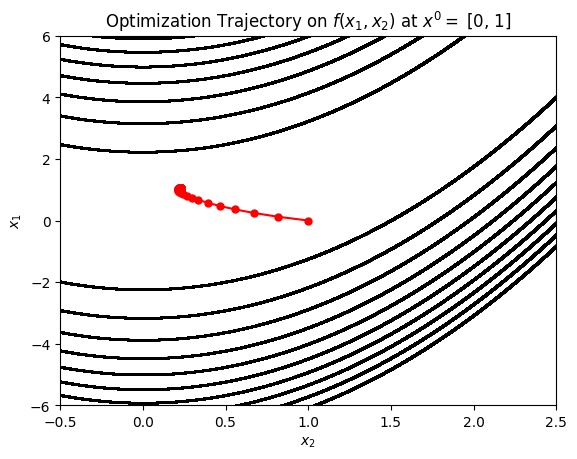

In [ ]:
# Function to solve quadratic equation
def solve_for_y(x, c_i):
    # Coefficients of the quadratic equation
    a = 100
    b = -200*x**2
    c = 100*x**4 + (x-1)**2 - c_i
    
    # Calculate discriminant
    discriminant = b**2 - 4 * a * c
    
    if discriminant < 0:
        # No real solution
        return []
    
    # Calculate the two solutions
    y1 = (-b + np.sqrt(discriminant)) / (2 * a)
    y2 = (-b - np.sqrt(discriminant)) / (2 * a)
    
    return [y1, y2]

# Contour array
c = 5000 - 500*np.linspace(0,10,11)

# Range of x values
x_values = np.linspace(-10, 10, 100000)  # Avoid division by zero by starting from a small positive value

# Calculate corresponding y values
for cntr in range(c.shape[0]):
    results = []
    c_i = c[cntr]
    for x in x_values:
        y_solutions = solve_for_y(x, c_i)
        for y in y_solutions:
            #if y > 0:  # Ensure y is positive
            results.append((x, y))
                
    
    results_array = np.zeros([len(results), 2])
    for i in range(len(results)):
        
        results_array[i,0] = results[i][0]
        results_array[i,1] = results[i][1]

    plt.scatter(results_array[:,0], results_array[:,1], s=1, c='black')

plt.plot(points_array[::10,1],points_array[::10,0],'-ro', markersize=5)
plt.xlim([-0.5,2.5])
plt.ylim([-6,6])
plt.xlabel(r'$x_2$'), plt.ylabel(r'$x_1$')
plt.title(rf'Optimization Trajectory on $f(x_{1},x_{2})$ at $x^{0} =\;$[{x0[0]}, {x0[1]}]')